In [192]:
from linearmodels import PanelOLS
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [285]:
df = pd.read_csv('processed_urinary_more.csv')
df['MSA'].astype('str')
df['state'] = df['MSA'].apply(lambda x: x.split(',')[1].strip())
df['Year'] = df['Year'].astype(int)
df['const'] = 1
df = df[df['min_dist'] < 100]

<AxesSubplot:xlabel='MSA'>

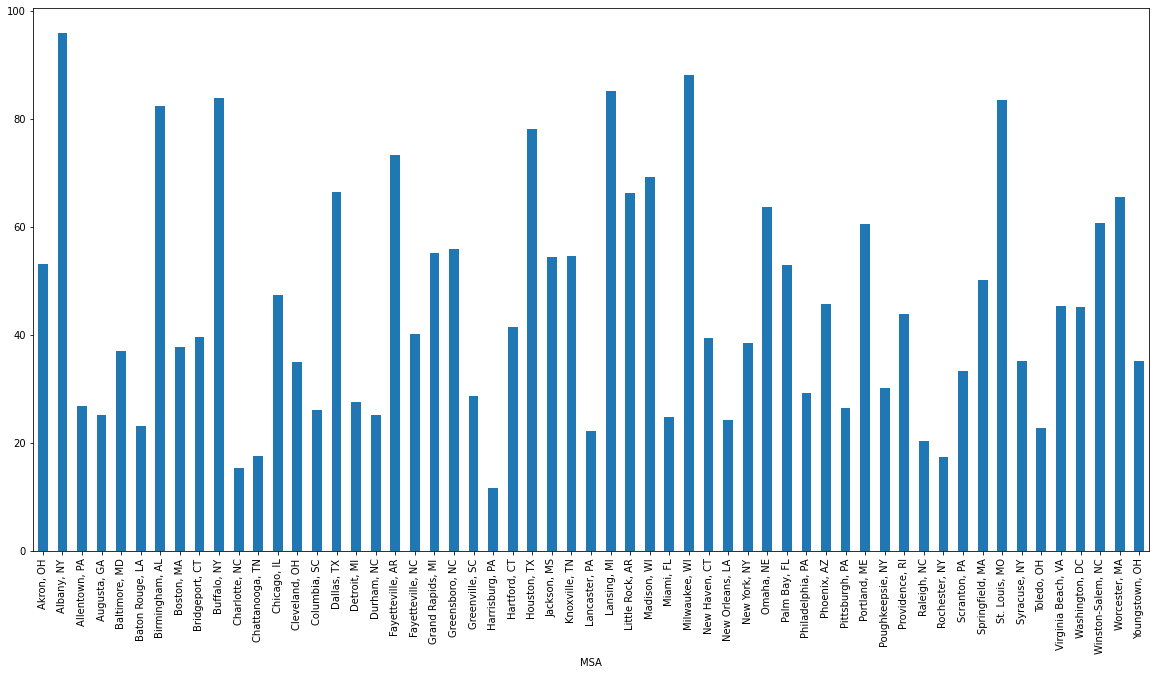

In [286]:
temp = df.set_index(['MSA'])
dists = temp.groupby('MSA').min_dist.mean()
dists.plot(kind='bar', figsize=(20, 10))

In [287]:
tdf = df.set_index(['MSA', 'Year'])

In [288]:
mod = sm.OLS(df['Crude Rate'], df[['const', 'min_dist', 'Sex', "Asian", 'Black']])
time = mod.fit(cov_type='HC1')
print(time.summary())

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1598.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:13:52   Log-Likelihood:                -12788.
No. Observations:                3263   AIC:                         2.559e+04
Df Residuals:                    3258   BIC:                         2.562e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4388      0.525     65.644      0.0

In [289]:
# Time FE with controls
mod = PanelOLS(tdf['Crude Rate'], tdf[['const', 'min_dist', 'Sex', "Asian", 'Black']], entity_effects=False, time_effects=True)
time = mod.fit(cov_type='robust')
print(time)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.7329
Estimator:                   PanelOLS   R-squared (Between):              0.5338
No. Observations:                3263   R-squared (Within):               0.7468
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.7107
Time:                        01:13:52   Log-likelihood                -1.263e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2222.3
Entities:                          57   P-value                           0.0000
Avg Obs:                       57.246   Distribution:                  F(4,3240)
Min Obs:                       4.0000                                           
Max Obs:                       114.00   F-statistic (robust):             1740.3
                            

In [290]:
# print out dummies
year_str = df.reset_index()[['Year']].astype('str')
msa_str = df.reset_index()[['MSA']].astype('str')
year_str.index = tdf.index
msa_str.index = tdf.index
tdf['year_str'] = year_str
tdf['msa_str'] = msa_str
tdf['year_str'] = tdf['year_str'].astype('str')
tdf['msa_str'] = tdf['msa_str'].astype('str')

In [291]:
mod = PanelOLS(tdf['Crude Rate'], tdf[['const', 'min_dist', 'year_str']], entity_effects=False, time_effects=False, drop_absorbed=True)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.0152
Estimator:                   PanelOLS   R-squared (Between):             -0.0646
No. Observations:                3263   R-squared (Within):               0.0180
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.0152
Time:                        01:13:52   Log-likelihood                -1.479e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2.6409
Entities:                          57   P-value                           0.0001
Avg Obs:                       57.246   Distribution:                 F(19,3243)
Min Obs:                       4.0000                                           
Max Obs:                       114.00   F-statistic (robust):             2.9024
                            

In [292]:
# print out dummies
year_str = df.reset_index()[['Year']].astype('str')
state_str = df.reset_index()[['state']].astype('str')
sdf = df.set_index(['state', 'Year'])
year_str.index = sdf.index
state_str.index = sdf.index
sdf['year_str'] = year_str
sdf['state_str'] = state_str

In [293]:
# time FE
mod = PanelOLS(sdf['Crude Rate'], sdf[['const','min_dist', 'year_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.0152
Estimator:                   PanelOLS   R-squared (Between):              0.0217
No. Observations:                3263   R-squared (Within):               0.0143
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.0152
Time:                        01:13:52   Log-likelihood                -1.479e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2.6409
Entities:                          26   P-value                           0.0001
Avg Obs:                       125.50   Distribution:                 F(19,3243)
Min Obs:                       32.000                                           
Max Obs:                       353.00   F-statistic (robust):             2.9024
                            

In [294]:
# State FE
mod = PanelOLS(sdf['Crude Rate'], sdf[['const','min_dist', 'state_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.1417
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.0182
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.1417
Time:                        01:13:52   Log-likelihood                -1.456e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      20.551
Entities:                          26   P-value                           0.0000
Avg Obs:                       125.50   Distribution:                 F(26,3236)
Min Obs:                       32.000                                           
Max Obs:                       353.00   F-statistic (robust):             29.683
                            

In [295]:
# State FE + time FE
mod = PanelOLS(sdf['Crude Rate'], sdf[['const', 'min_dist', 'state_str','year_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.1573
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.0361
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.1573
Time:                        01:13:53   Log-likelihood                -1.453e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      13.656
Entities:                          26   P-value                           0.0000
Avg Obs:                       125.50   Distribution:                 F(44,3218)
Min Obs:                       32.000                                           
Max Obs:                       353.00   F-statistic (robust):             18.527
                            

In [296]:
# State FE + Controls
mod = PanelOLS(sdf['Crude Rate'], sdf[['const', 'min_dist', 'state_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.1417
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.0182
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.1417
Time:                        01:13:53   Log-likelihood                -1.456e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      20.551
Entities:                          26   P-value                           0.0000
Avg Obs:                       125.50   Distribution:                 F(26,3236)
Min Obs:                       32.000                                           
Max Obs:                       353.00   F-statistic (robust):             29.683
                            

<AxesSubplot:>

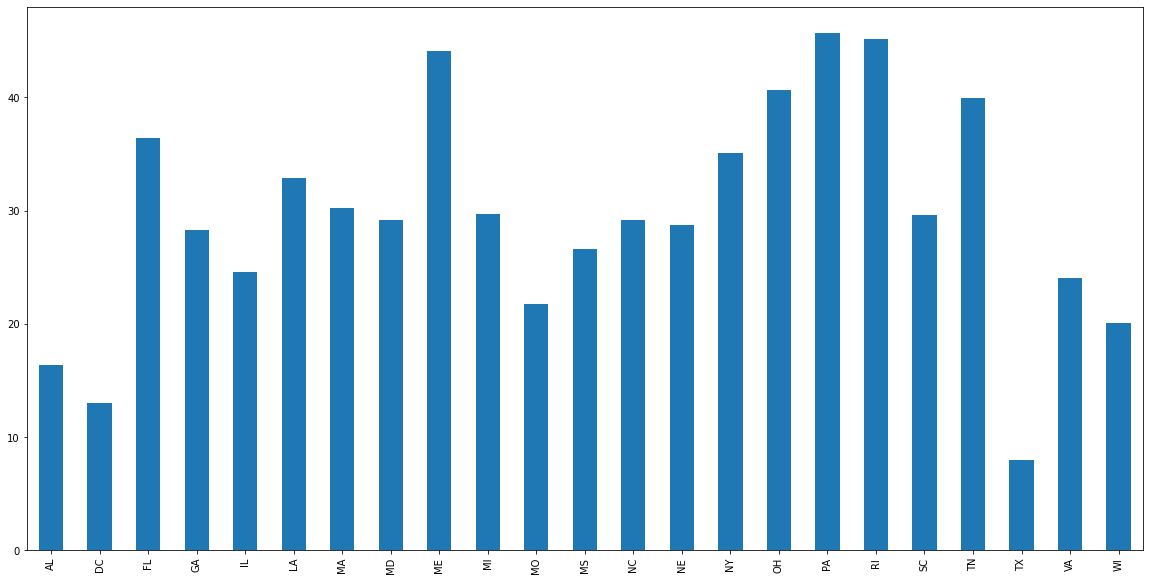

In [297]:
params = entity.params.iloc[[0]+list(range(5, len(entity.params)))]
params.iloc[1:] = params.iloc[1:] +  params.iloc[0]
params.index = [np.unique(df['state'])[0]] +  list(map(lambda x: x.split(".")[1], params.index[1:]))
params.plot(kind='bar', figsize=(20, 10))

In [298]:
year_str = df.reset_index()[['Year']].astype('str')
plant_str = df.reset_index()[['plant_name']].astype('str')
pdf = df.set_index(['plant_name', 'Year'])
year_str.index = pdf.index
plant_str.index = pdf.index
pdf['year_str'] = year_str
pdf['plant_str'] = plant_str

In [299]:
# Plant FE
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'plant_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.1804
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.0073
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.1804
Time:                        01:13:53   Log-likelihood                -1.449e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      17.296
Entities:                          41   P-value                           0.0000
Avg Obs:                       79.585   Distribution:                 F(41,3221)
Min Obs:                       29.000                                           
Max Obs:                       206.00   F-statistic (robust):             21.681
                            

In [300]:
# Plant FE
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'Sex', 'Asian', 'Black', 'plant_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.7913
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.7472
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.7913
Time:                        01:13:54   Log-likelihood                -1.226e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      277.29
Entities:                          41   P-value                           0.0000
Avg Obs:                       79.585   Distribution:                 F(44,3218)
Min Obs:                       29.000                                           
Max Obs:                       206.00   F-statistic (robust):             216.21
                            

In [307]:
# Plant FE + Controls
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'Sex', 'Black', 'Asian','plant_str']], entity_effects=False, time_effects=False)
entity_controls = mod.fit(cov_type='robust')
print(entity_controls)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.7913
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.7472
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.7913
Time:                        01:15:47   Log-likelihood                -1.226e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      277.29
Entities:                          41   P-value                           0.0000
Avg Obs:                       79.585   Distribution:                 F(44,3218)
Min Obs:                       29.000                                           
Max Obs:                       206.00   F-statistic (robust):             216.21
                            

In [302]:
# Plant FE + Year FE + Controls
mod = PanelOLS(pdf['Crude Rate'], pdf[['const', 'min_dist', 'Sex', 'Black', 'Asian', 'plant_str', 'year_str']], entity_effects=False, time_effects=False)
entity = mod.fit(cov_type='robust')
print(entity)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Crude Rate   R-squared:                        0.8176
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                3263   R-squared (Within):               0.7791
Date:                Thu, Dec 10 2020   R-squared (Overall):              0.8176
Time:                        01:13:54   Log-likelihood                -1.204e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      231.38
Entities:                          41   P-value                           0.0000
Avg Obs:                       79.585   Distribution:                 F(62,3200)
Min Obs:                       29.000                                           
Max Obs:                       206.00   F-statistic (robust):             178.77
                            

In [303]:
np.unique(df.plant_name)

array(['Arkansas Nuclear One', 'Beaver Valley', 'Browns Ferry',
       'Byron Generating Station', 'Callaway',
       'Calvert Cliffs Nuclear Power Plant', 'Clinton Power Station',
       'Comanche Peak', 'Cooper Nuclear Station', 'Davis Besse',
       'Dresden Generating Station', 'Fermi', 'Grand Gulf', 'Harris',
       'Indian Point 2', 'Indian Point 3', 'James A Fitzpatrick',
       'Limerick', 'McGuire', 'Millstone', 'Oconee', 'Palisades',
       'Palo Verde', 'Peach Bottom', 'Perry',
       'Pilgrim Nuclear Power Station', 'Point Beach Nuclear Plant',
       'R E Ginna Nuclear Power Plant', 'River Bend', 'Seabrook',
       'Sequoyah', 'South Texas Project', 'St Lucie', 'Surry',
       'TalenEnergy Susquehanna', 'Three Mile Island', 'Turkey Point',
       'V C Summer', 'Vogtle', 'Waterford 3', 'Watts Bar Nuclear Plant'],
      dtype=object)

<AxesSubplot:>

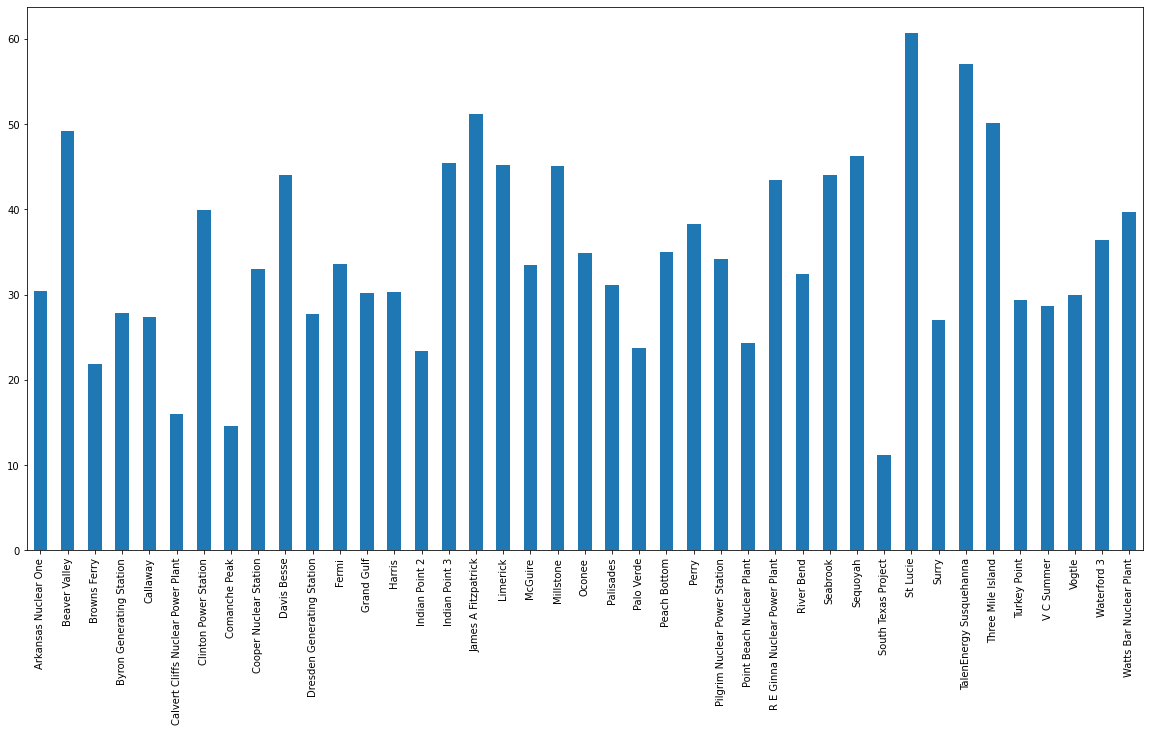

In [304]:
params = entity_controls.params.iloc[[0]+list(range(2, len(entity_controls.params)))]
params.iloc[1:] = params.iloc[1:] +  params.iloc[0]
params.index = [np.unique(df['plant_name'])[0]] +  list(map(lambda x: x.split(".")[1], params.index[1:]))
params.plot(kind='bar', figsize=(20, 10))

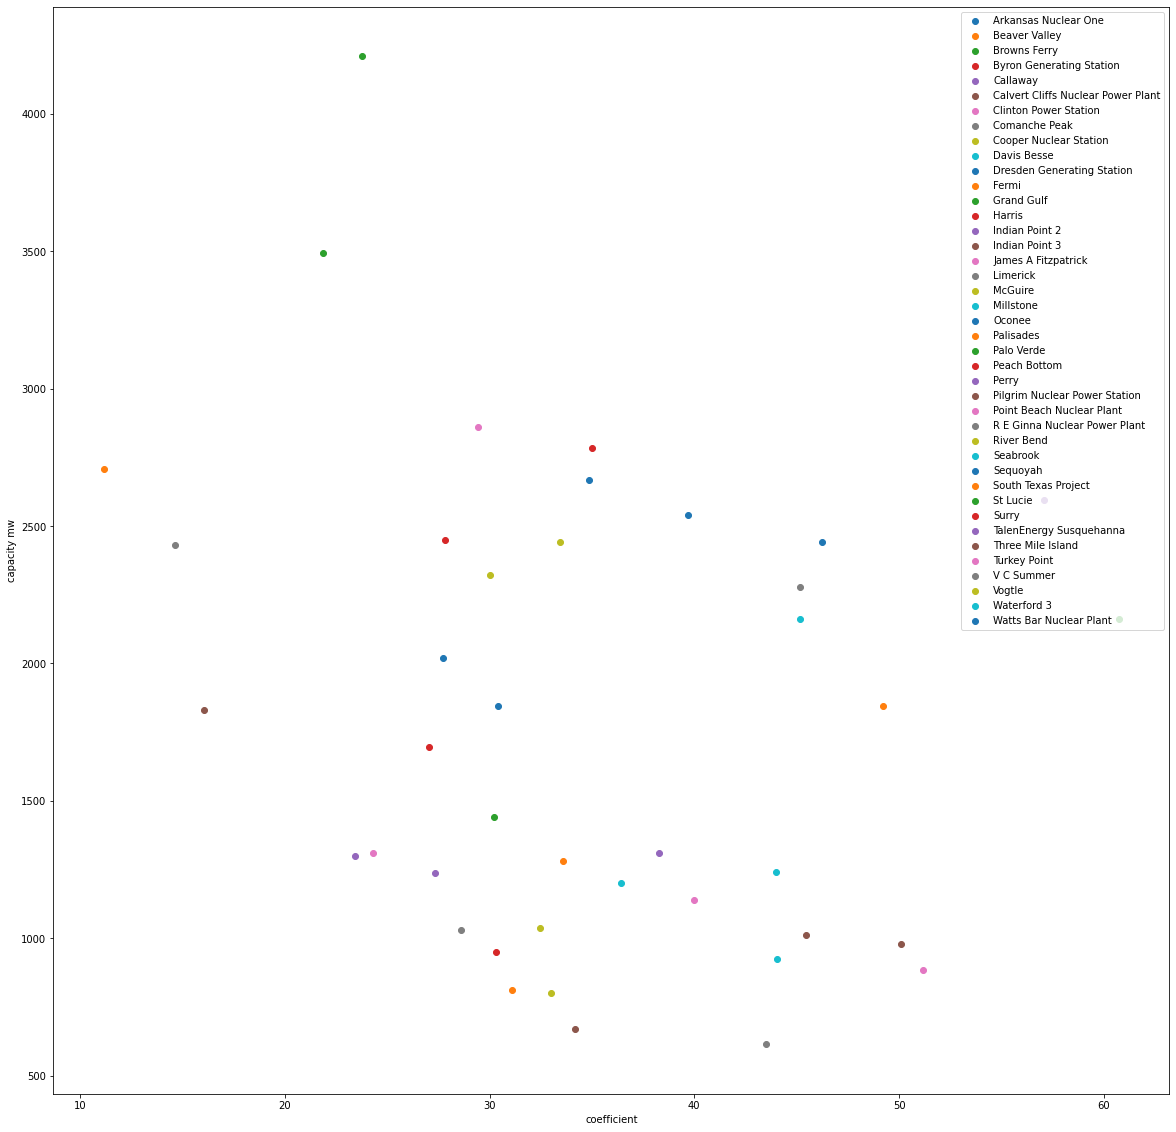

In [305]:
capacities = []
plt.figure(figsize=(20, 20))
for i in range(len(params)):
    capacities.append(pdf['capacity'][params.index[i]].iloc[0])
    plt.scatter(params.iloc[i], pdf['capacity'][params.index[i]].iloc[0])
plt.legend(params.index)
plt.xlabel('coefficient')
plt.ylabel('capacity mw')
plt.show()

In [306]:
X = sm.add_constant(params)
r = sm.OLS(capacities, X).fit(cov_type='HC1')
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.000
Date:                Thu, 10 Dec 2020   Prob (F-statistic):              0.165
Time:                        01:13:57   Log-Likelihood:                -332.54
No. Observations:                  41   AIC:                             669.1
Df Residuals:                      39   BIC:                             672.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2362.3867    445.723      5.300      0.0